# Data cleaning

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', False)

In [23]:
consumer_data: pd.DataFrame = pd.read_csv('./data/marketing_campaign.csv', sep='\t')
consumer_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [24]:
# Finding number of records
consumer_data.shape[0]

2240

In [25]:
# Finding general information about the columns
consumer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### 1. Handling missing values

In [26]:
''' 
We see that the non null count of "Income" is least and reduces the dataset
by only 1% i,e 24 rows, so we do either of the 2 things
1. We can drop the records directly
2. We can fill the missing values

Since we do not have a lot of data, we prefer to retain the records and fill them with mean income value
'''
consumer_data['Income'].fillna(consumer_data['Income'].mean(), inplace=True)

### 2. Dropping Duplicate records

In [27]:
# We directly drop duplicates as they do not contribute uniquely to our models
consumer_data.drop_duplicates(inplace=True)
consumer_data.shape[0]

2240

### 3. Format Standardizing

In [28]:
'''
We standardize formatting of numberical values, floating point precisions and formatting the date column
'''
consumer_data['Dt_Customer'] = pd.to_datetime(consumer_data['Dt_Customer'], format='%d-%m-%Y')
consumer_data['Income'] = consumer_data['Income'].round(2)

### 4. Structural Consistency

In [29]:
'''
We make sure the labels of categorical data are consistent, so that we do not face encoding
challenged later
'''
print('Education column value = ', consumer_data['Education'].unique())
print('Maritial status column value = ',consumer_data['Marital_Status'].unique())

consumer_data['Education'] = consumer_data['Education'].str.lower()
consumer_data['Marital_Status'] = consumer_data['Marital_Status'].str.lower()

Education column value =  ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Maritial status column value =  ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [30]:
'''
Here we see 2n cycle and master correspond to the same education level
Similarly to reduce unnecessary complexity, 
    we mark single, alone, absurd, widow, divorced, yolo as single and 
    together, married as married
'''
education_mapping = {
    'graduation': 'grad',
    'phd': 'postgrad',
    'master': 'postgrad',
    'basic': 'grad',
    '2n cycle': 'postgrad'
}

maritial_status_mapping = {
    'single': 'single',
    'together': 'married',
    'married': 'married',
    'divorced': 'single',
    'widow': 'single',
    'alone': 'single',
    'absurd': 'single',
    'yolo': 'single',
}
consumer_data['Education'] = consumer_data['Education'].replace(education_mapping)
consumer_data['Marital_Status'] = consumer_data['Marital_Status'].replace(maritial_status_mapping)

consumer_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,grad,single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,grad,single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,grad,married,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,grad,married,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,postgrad,married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [31]:
'''
We plot statistics of the dataset to find more about data
'''
consumer_data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251339,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


#### Observations:
1. ID is just a unique field which does not have any signifance to predicting or clustering, we can use index instead of the id
2. Z_CostContact and Z_Revenue have same values throughout the dataset, hence they are redundant
3. Income might have outlier becasue the max income is really far away from mean as well as 3rd quantile
4. Year_Birth might also have outlier since mean=1968, std=12 and min value=1893

### 5. Dropping unwanted features

In [32]:
consumer_data.drop(columns=['Z_CostContact', 'Z_Revenue', 'ID'], inplace=True)
consumer_data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,grad,single,58138.0,0,0,2012-09-04,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,grad,single,46344.0,1,1,2014-03-08,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,grad,married,71613.0,0,0,2013-08-21,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,grad,married,26646.0,1,0,2014-02-10,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,postgrad,married,58293.0,1,0,2014-01-19,94,173,43,...,3,6,5,0,0,0,0,0,0,0


#### 6. Finding Outliers

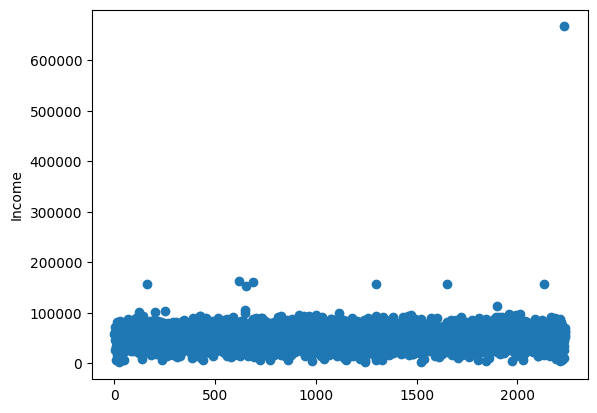

In [33]:
x = [i for i in range(0, consumer_data.shape[0])]
plt.scatter(x, consumer_data['Income'])
plt.ylabel('Income')
plt.show()

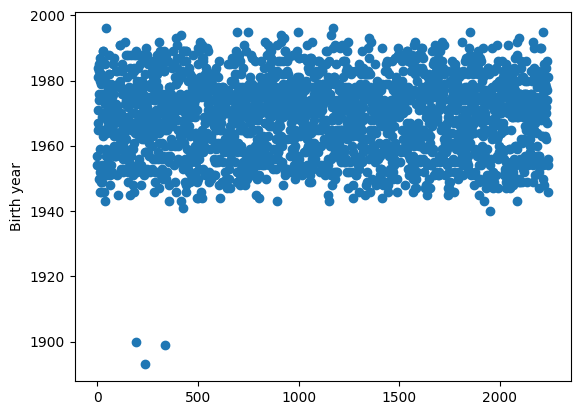

In [34]:
x = [i for i in range(0, consumer_data.shape[0])]
plt.scatter(x, consumer_data['Year_Birth'])
plt.ylabel('Birth year')
plt.show()

In [35]:
'''
We remove the outliers from income and year_birth column
For income, we remove the few local outliers, hence we cap income to 140000
'''
consumer_data = consumer_data[(consumer_data['Income'] < 140000) & (consumer_data['Year_Birth'] > 1920)]
consumer_data.shape[0]

2229

### 7. Feature Selection

In [36]:
'''
We can reduce some columns like "Kidhome" and "Teenhome" by combining them
'''
consumer_data['Children'] = consumer_data['Kidhome'] + consumer_data['Teenhome']
consumer_data.drop(columns=['Kidhome', 'Teenhome'], inplace=True)
consumer_data.head()


,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children
0,1957,grad,single,58138.0,2012-09-04,58,635,88,546,172,...,4,7,0,0,0,0,0,0,1,0
1,1954,grad,single,46344.0,2014-03-08,38,11,1,6,2,...,2,5,0,0,0,0,0,0,0,2
2,1965,grad,married,71613.0,2013-08-21,26,426,49,127,111,...,10,4,0,0,0,0,0,0,0,0
3,1984,grad,married,26646.0,2014-02-10,26,11,4,20,10,...,4,6,0,0,0,0,0,0,0,1
4,1981,postgrad,married,58293.0,2014-01-19,94,173,43,118,46,...,6,5,0,0,0,0,0,0,0,1


### 8. Column Label Renaming

In [37]:
'''
Column label renaming helps us the make column name more intuitive, concise and consistent
'''
column_name_map = {
    'Recency': 'Last_Purchase',
    'MntWines': 'Wines',
    'MntFruits': 'Fruits',
    'MntMeatProducts': 'Meat',
    'MntFishProducts': 'Fish',
    'MntSweetProducts': 'Sweet',
    'MntGoldProds': 'Gold',
    'NumDealsPurchases': 'Deal_Purchases',
	'NumWebPurchases': 'Web_Purchases',
	'NumCatalogPurchases': 'Catalog_Purchases',
	'NumStorePurchases': 'Store_Purchases',
	'NumWebVisitsMonth': 'Web_Visits',
}
consumer_data.rename(columns=column_name_map, inplace=True)
consumer_data.head()

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Last_Purchase,Wines,Fruits,Meat,Fish,...,Store_Purchases,Web_Visits,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children
0,1957,grad,single,58138.0,2012-09-04,58,635,88,546,172,...,4,7,0,0,0,0,0,0,1,0
1,1954,grad,single,46344.0,2014-03-08,38,11,1,6,2,...,2,5,0,0,0,0,0,0,0,2
2,1965,grad,married,71613.0,2013-08-21,26,426,49,127,111,...,10,4,0,0,0,0,0,0,0,0
3,1984,grad,married,26646.0,2014-02-10,26,11,4,20,10,...,4,6,0,0,0,0,0,0,0,1
4,1981,postgrad,married,58293.0,2014-01-19,94,173,43,118,46,...,6,5,0,0,0,0,0,0,0,1


### 9. Feature scaling

In [38]:
'''
We scale Dt_customer in this block by anchoring it to 1st January 2023
'''
consumer_data['Age'] = 2023 - consumer_data['Year_Birth']
consumer_data['Customer_From'] = (pd.to_datetime('2023-01-01') - consumer_data['Dt_Customer']).dt.days
consumer_data.head()

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Last_Purchase,Wines,Fruits,Meat,Fish,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children,Age,Customer_From
0,1957,grad,single,58138.0,2012-09-04,58,635,88,546,172,...,0,0,0,0,0,0,1,0,66,3771
1,1954,grad,single,46344.0,2014-03-08,38,11,1,6,2,...,0,0,0,0,0,0,0,2,69,3221
2,1965,grad,married,71613.0,2013-08-21,26,426,49,127,111,...,0,0,0,0,0,0,0,0,58,3420
3,1984,grad,married,26646.0,2014-02-10,26,11,4,20,10,...,0,0,0,0,0,0,0,1,39,3247
4,1981,postgrad,married,58293.0,2014-01-19,94,173,43,118,46,...,0,0,0,0,0,0,0,1,42,3269


### 10. Label Encoding

In [39]:
'''
We can encode category labels
'''
consumer_data['Education'] = consumer_data['Education'].astype("category").cat.codes.to_list()
consumer_data['Marital_Status'] = consumer_data['Marital_Status'].astype("category").cat.codes.to_list()
consumer_data.head()

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Last_Purchase,Wines,Fruits,Meat,Fish,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children,Age,Customer_From
0,1957,0,1,58138.0,2012-09-04,58,635,88,546,172,...,0,0,0,0,0,0,1,0,66,3771
1,1954,0,1,46344.0,2014-03-08,38,11,1,6,2,...,0,0,0,0,0,0,0,2,69,3221
2,1965,0,0,71613.0,2013-08-21,26,426,49,127,111,...,0,0,0,0,0,0,0,0,58,3420
3,1984,0,0,26646.0,2014-02-10,26,11,4,20,10,...,0,0,0,0,0,0,0,1,39,3247
4,1981,1,0,58293.0,2014-01-19,94,173,43,118,46,...,0,0,0,0,0,0,0,1,42,3269


### 11. Data normalization

In [40]:
'''
We normalize the feature values
'''
consumer_data['Income'] = ((consumer_data['Income'] - consumer_data['Income'].min()) / (consumer_data['Income'].max() - consumer_data['Income'].min()))

consumer_data['Income'] = consumer_data['Income'].round(2)

consumer_data.head()

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Last_Purchase,Wines,Fruits,Meat,Fish,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children,Age,Customer_From
0,1957,0,1,0.50,2012-09-04,58,635,88,546,172,...,0,0,0,0,0,0,1,0,66,3771
1,1954,0,1,0.40,2014-03-08,38,11,1,6,2,...,0,0,0,0,0,0,0,2,69,3221
2,1965,0,0,0.62,2013-08-21,26,426,49,127,111,...,0,0,0,0,0,0,0,0,58,3420
3,1984,0,0,0.22,2014-02-10,26,11,4,20,10,...,0,0,0,0,0,0,0,1,39,3247
4,1981,1,0,0.51,2014-01-19,94,173,43,118,46,...,0,0,0,0,0,0,0,1,42,3269


### 12. Data Validation
We just visually go through the data and its statistics to confirm if all the parametes look correct to avoid any inconsistencies

In [41]:
consumer_data.to_csv('./data/clean_consumer_data.csv', index=False)